In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import random as random


trainset_1 = pd.read_csv('EEG_mouse_data_1.csv')
trainset_2 = pd.read_csv('EEG_mouse_data_2.csv')
testset_1 = pd.read_csv('EEG_mouse_data_test.csv')


In [3]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def normalize(df):
    headers = df.columns
    scaler = StandardScaler()
    
    numerical_columns = df.select_dtypes(include=['int', 'float']).columns
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    normalized_data = pd.DataFrame(df, columns=headers[:-1])

    return normalized_data

In [4]:

trainset_1 = trainset_1.iloc[:,:26]

trainset_1 = normalize(trainset_1)
X = trainset_1.drop('state', axis=1)
y = trainset_1['state'].map({'w': 2, 'r': 1, 'n': 0})


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import layers
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Input
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.regularizers import l1, l2

# momentum: [0, 0.8, 0.9, 0.99]
# learning_rate: [0.1, 0.01, 0.001, 0.0001]
def create_model_three_class():
   # model = keras.Sequential()
   # model.add(Input(shape=(X.shape[1], 1)))  # Ajouter une couche d'entrée
   # model.add(LSTM(5))
   # model.add(Dense(3, activation='softmax'))
   # model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model = Sequential()
    model.add(Conv1D(filters=40, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(3, activation='softmax'))  # Couche de sortie avec activation softmax
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


model = create_model_three_class()
model.summary()


C:\Users\Julien\miniconda3\envs\ARN\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 22, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 11, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 352)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          35,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,731 (139.57 KB)

 Trainable params: 35,731 (139.57 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 3 classes
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import random as random
from sklearn.utils import class_weight
from keras.utils import to_categorical

# splitting en 3 folds
keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True)

history_list_three_class = []
trained_mlp_three_class = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    
    model = create_model_three_class()
    X_reshaped = X.values.reshape(X.shape[0], X.shape[1], 1)
    y_one_hot = to_categorical(y, num_classes=3)

    history = model.fit(x=X_reshaped[train_index], y=y_one_hot[train_index], 
                        validation_data=(X_reshaped[test_index], y_one_hot[test_index]),
                        batch_size=32,
                        epochs=100)
    
    history_list_three_class.append(history)
    trained_mlp_three_class.append(model)

Epoch 1/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8469 - loss: 1.0474 - val_accuracy: 0.8687 - val_loss: 0.4183
Epoch 2/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8815 - loss: 0.3687 - val_accuracy: 0.8675 - val_loss: 0.4020
Epoch 3/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8823 - loss: 0.3575 - val_accuracy: 0.8687 - val_loss: 0.3931
Epoch 4/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8840 - loss: 0.3523 - val_accuracy: 0.8701 - val_loss: 0.3823
Epoch 5/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8857 - loss: 0.3481 - val_accuracy: 0.8746 - val_loss: 0.3706
Epoch 6/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8876 - loss: 0.3446 - val_accuracy: 0.8755 - val_loss: 0.3670
Epoch 7/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8883 - loss: 0.3419 - val_accuracy: 0.8780 - val_loss: 0.3591
Epoch 8/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8884 - loss: 0.3395 - val_accu

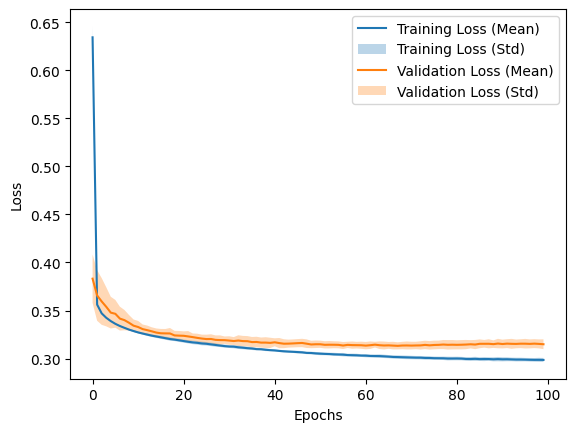

In [7]:
# classes

import numpy as np
import matplotlib.pyplot as pl
train_losses = np.array([history.history['loss'] for history in history_list_three_class])
val_losses = np.array([history.history['val_loss'] for history in history_list_three_class])

# Calculate mean and standard deviation for training and validation losses
mean_train_loss = np.mean(train_losses, axis=0)
std_train_loss = np.std(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)
std_val_loss = np.std(val_losses, axis=0)

# Plot mean and standard deviation for training loss
pl.plot(mean_train_loss, label='Training Loss (Mean)')
pl.fill_between(range(len(mean_train_loss)), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.3, label='Training Loss (Std)')

# Plot mean and standard deviation for validation loss
pl.plot(mean_val_loss, label='Validation Loss (Mean)')
pl.fill_between(range(len(mean_val_loss)), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.3, label='Validation Loss (Std)')

# Add labels and legend
pl.xlabel('Epochs')
pl.ylabel('Loss')
pl.legend()

# Display the plot
pl.show()

212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
F1 Score - Fold 1: 0.8956019546868058
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 Score - Fold 2: 0.9019694950392418
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step
F1 Score - Fold 3: 0.8933649289099526


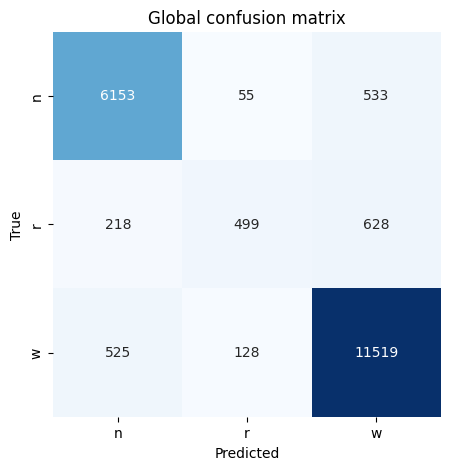

Mean F1 Score across all folds: 0.8969787928786667


In [14]:
# 3 classes

import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, title):
    # Plot confusion matrix
    pl.figure(figsize=(5, 5))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["n", "r", "w"], yticklabels=["n", "r", "w"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()

f1_scores = []
mean_confusion_matrix = np.zeros((3, 3))

for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Evaluate the trained model on the test fold
    predicted_probabilities = trained_mlp_three_class[i].predict(X.iloc[test_index])
    predictions = np.argmax(predicted_probabilities, axis=1)
    true_labels = y.iloc[test_index]

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    mean_confusion_matrix += confusion_matrix(true_labels, predictions)

    # Compute confusion matrix and plot
    #plot_confusion_matrix(cm, f'Confusion Matrix - Fold {i + 1}')

    # Compute F1 score
    f1 = f1_score(true_labels, predictions, average='micro')
    f1_scores.append(f1)
    print(f"F1 Score - Fold {i + 1}: {f1}")

# Plot mean confusion matrix
plot_confusion_matrix(mean_confusion_matrix, 'Global confusion matrix')

# Calculate and display the mean F1 score across all folds
mean_f1_score = np.mean(f1_scores)
print(f"Mean F1 Score across all folds: {mean_f1_score}")